In [3]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [4]:
df = pd.read_csv('pre_proc_data.csv', sep=',')

In [5]:
df['date'] = df['created_at'].apply(
    lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S').strftime('%Y-%m-%d') if isinstance(x, str) else 0
)
df['date'] = pd.to_datetime(df['date'])
df = df[df["date"] >= '2019-11-01']

In [6]:
df.head()

,text,author_id,conversation_id,created_at,source,tweet_id,geo_id,retweet_count,reply_count,like_count,quote_count,in_reply_to_user_id,referenced_type,referenced_id,emojis_sentiment,text_sentiment,sentiment_value,date
2718,"minha mae chegou aq em casa c uma skol, uma co...",1.086716e+18,1.190413e+18,2019-11-01 23:38:48,Twitter for Android,1.190413e+18,97bcdfca1a2dca59,0.0,0.0,0.0,0.0,NaN,NaN,NaN,"{'neg': 0, 'neu': 0, 'pos': 0}","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,2019-11-01
2719,@HelinhoRdr Helinho para de mandar vírus por f...,6.909661e+07,1.190403e+18,2019-11-01 23:19:11,Twitter for Android,1.190408e+18,68e019afec7d0ba5,0.0,0.0,0.0,0.0,50347048.0,replied_to,1.190403e+18,"{'neg': 0, 'neu': 0, 'pos': 0}","{'neg': 0.152, 'neu': 0.571, 'pos': 0.276, 'co...",0.3182,2019-11-01
2720,House Opus Vaibe Corona\nSunset lindo toda a v...,7.759727e+08,1.190408e+18,2019-11-01 23:17:26,Twitter for iPhone,1.190408e+18,0fc397927a55e003,0.0,1.0,2.0,0.0,NaN,NaN,NaN,"{'neg': 0, 'neu': 0, 'pos': 0}","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,2019-11-01
2721,To doida pra chegar em casa e abrir uma Corona 🤤,1.117039e+18,1.190404e+18,2019-11-01 23:02:45,Twitter for iPhone,1.190404e+18,97bcdfca1a2dca59,0.0,0.0,0.0,0.0,NaN,NaN,NaN,"{'neg': 0, 'neu': 0, 'pos': 0}","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,2019-11-01
2722,Vou beber minha corona estou super estressada,8.624292e+17,1.190394e+18,2019-11-01 22:23:59,Twitter for Android,1.190394e+18,abbb45debbf38127,1.0,0.0,1.0,0.0,NaN,NaN,NaN,"{'neg': 0, 'neu': 0, 'pos': 0}","{'neg': 0.0, 'neu': 0.606, 'pos': 0.394, 'comp...",0.5994,2019-11-01


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1498580 entries, 2718 to 1505182
Data columns (total 18 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   text                 1498580 non-null  object        
 1   author_id            1498580 non-null  float64       
 2   conversation_id      1498580 non-null  float64       
 3   created_at           1498580 non-null  object        
 4   source               1498580 non-null  object        
 5   tweet_id             1498580 non-null  float64       
 6   geo_id               1498580 non-null  object        
 7   retweet_count        1498580 non-null  float64       
 8   reply_count          1498580 non-null  float64       
 9   like_count           1498580 non-null  float64       
 10  quote_count          1498580 non-null  float64       
 11  in_reply_to_user_id  548960 non-null   float64       
 12  referenced_type      430401 non-null   object        

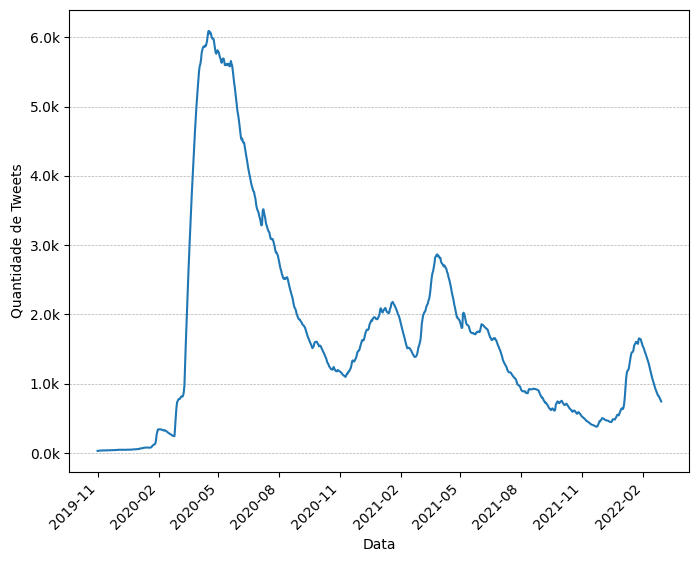

In [9]:
from matplotlib.ticker import FuncFormatter
from typing import List
import matplotlib.dates as mdates

def smooth(scalars: List[float], weight: float) -> List[float]:  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value
        
    return smoothed


def thousands(x, pos):
    'The two args are the value and tick position'
    return '%1.1fk' % (x*1e-3)

formatter = FuncFormatter(thousands)

fig, ax = plt.subplots(figsize = (8, 6))

df_ = df["date"].groupby(df["date"]).count().reset_index(name ='quantity')
df_

plt.xlabel("Data")
plt.ylabel("Quantidade de Tweets")
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.5)
half_year_locator = mdates.MonthLocator(interval=3)
year_month_formatter = mdates.DateFormatter("%Y-%m") # four digits for year, two for month
ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_major_formatter(year_month_formatter) # formatter for major axis only
ax.yaxis.set_major_formatter(formatter)
plt.xticks(rotation=45, ha='right')
ax.plot(df_['date'], smooth(df_['quantity'], 0.95))

In [10]:
df['sentiment'] = df.apply(lambda x: 'Negativo' if x['sentiment_value'] <= -.05 else 'Positivo' if x['sentiment_value'] >= .05 else 'Neutro', axis=1)

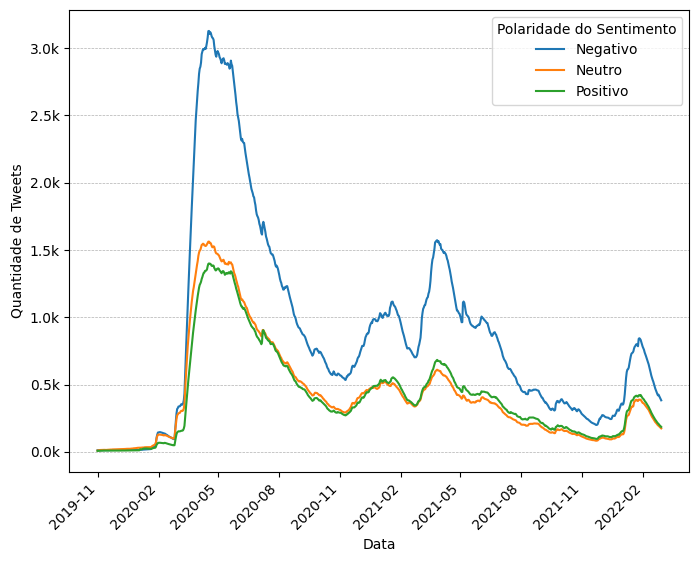

In [11]:
from matplotlib.ticker import FuncFormatter
from typing import List

def smooth(scalars: List[float], weight: float) -> List[float]:  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value
        
    return smoothed


def thousands(x, pos):
    'The two args are the value and tick position'
    return '%1.1fk' % (x*1e-3)

formatter = FuncFormatter(thousands)

fig, ax = plt.subplots(figsize = (8, 6))

df_ = df[["date", "sentiment"]].groupby(["date", "sentiment"]).size().reset_index(name ='quantity').pivot(index='date', columns='sentiment', values='quantity').reset_index()
df_

plt.xlabel("Data")
plt.ylabel("Quantidade de Tweets")
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.5)
half_year_locator = mdates.MonthLocator(interval=3)
year_month_formatter = mdates.DateFormatter("%Y-%m") # four digits for year, two for month
ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_major_formatter(year_month_formatter) # formatter for major axis only
ax.yaxis.set_major_formatter(formatter)
plt.xticks(rotation=45, ha='right')

num=0
for column in df_.drop('date', axis=1):
    num+=1
    plt.plot(df_['date'], smooth(df_[column], 0.95), marker='', label=column)
ax.legend(title="Polaridade do Sentimento")

(array([ 17489.,  48298.,  57885.,  62927.,  60993.,  59985.,  71438.,
         72181.,  72376.,  44717.,  86897.,  31443.,  39605.,  24927.,
         22676., 366709.,  27227.,  19500.,  27125.,  42504.,  35921.,
         50308.,  33966.,  26313.,  28839.,  20692.,  20000.,  13890.,
          9114.,   2635.]),
 array([-0.9974    , -0.93111333, -0.86482667, -0.79854   , -0.73225333,
        -0.66596667, -0.59968   , -0.53339333, -0.46710667, -0.40082   ,
        -0.33453333, -0.26824667, -0.20196   , -0.13567333, -0.06938667,
        -0.0031    ,  0.06318667,  0.12947333,  0.19576   ,  0.26204667,
         0.32833333,  0.39462   ,  0.46090667,  0.52719333,  0.59348   ,
         0.65976667,  0.72605333,  0.79234   ,  0.85862667,  0.92491333,
         0.9912    ]),
 <BarContainer object of 30 artists>)

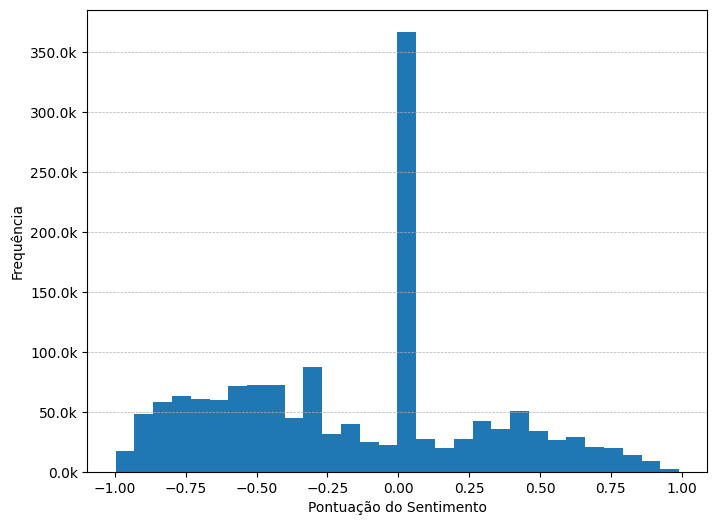

In [13]:
from matplotlib.ticker import FuncFormatter

def thousands(x, pos):
    'The two args are the value and tick position'
    return '%1.1fk' % (x*1e-3)

formatter = FuncFormatter(thousands)

fig, ax = plt.subplots(figsize = (8, 6))
plt.xlabel("Distribuição do Sentimento")
plt.ylabel("Frequência")
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.5)
ax.yaxis.set_major_formatter(formatter)
ax.hist(df['sentiment_value'], bins=30)

### Filtrando neutro

(array([ 5130., 20379., 28627., 34551., 34985., 35746., 36375., 41393.,
        32009., 38382., 38124., 52485., 33492., 31230., 60664., 28268.,
        18630., 75361., 19920., 20878., 11285., 36634.,  9844., 15643.,
            0.,     0.,  7256., 18928., 16207., 10985., 16819., 30457.,
        12860., 22009., 23405., 24769., 27188., 26180., 13036., 19414.,
        16458., 16322., 13357., 12314., 11080.,  8924.,  7180.,  5507.,
         3110.,   918.]),
 array([-0.9974  , -0.957628, -0.917856, -0.878084, -0.838312, -0.79854 ,
        -0.758768, -0.718996, -0.679224, -0.639452, -0.59968 , -0.559908,
        -0.520136, -0.480364, -0.440592, -0.40082 , -0.361048, -0.321276,
        -0.281504, -0.241732, -0.20196 , -0.162188, -0.122416, -0.082644,
        -0.042872, -0.0031  ,  0.036672,  0.076444,  0.116216,  0.155988,
         0.19576 ,  0.235532,  0.275304,  0.315076,  0.354848,  0.39462 ,
         0.434392,  0.474164,  0.513936,  0.553708,  0.59348 ,  0.633252,
         0.673024,  0.71

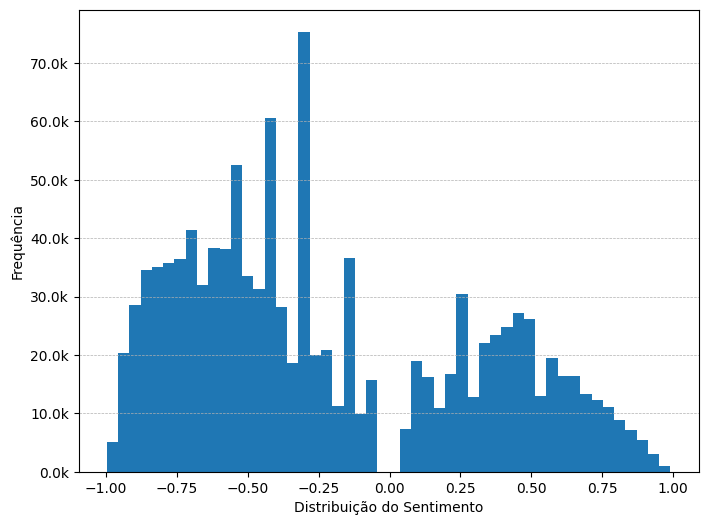

In [34]:
df_ = df[df['sentiment'] != 'Neutro']

def thousands(x, pos):
    'The two args are the value and tick position'
    return '%1.1fk' % (x*1e-3)

formatter = FuncFormatter(thousands)

fig, ax = plt.subplots(figsize = (8, 6))
plt.xlabel("Distribuição do Sentimento")
plt.ylabel("Frequência")
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.5)
ax.yaxis.set_major_formatter(formatter)
ax.hist(df_['sentiment_value'], bins=50)

In [30]:
df_.count()

text                   1124718
author_id              1124718
conversation_id        1124718
created_at             1124718
source                 1124718
tweet_id               1124718
geo_id                 1124718
retweet_count          1124718
reply_count            1124718
like_count             1124718
quote_count            1124718
in_reply_to_user_id     413689
referenced_type         326455
referenced_id           326455
emojis_sentiment       1124718
text_sentiment         1124718
sentiment_value        1124718
date                   1124718
sentiment              1124718
dtype: int64

(array([ 35550.,  78985.,  87598.,  90900., 103795.,  77961.,  93500.,
         97968.,  59296.,  34482.]),
 array([-0.9974 , -0.90266, -0.80792, -0.71318, -0.61844, -0.5237 ,
        -0.42896, -0.33422, -0.23948, -0.14474, -0.05   ]),
 <BarContainer object of 10 artists>)

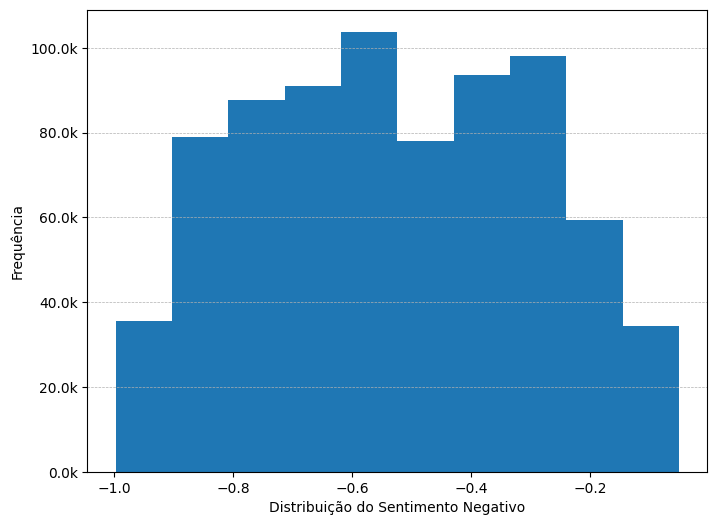

In [36]:
df_ = df[(df['sentiment'] == 'Negativo')]

def thousands(x, pos):
    'The two args are the value and tick position'
    return '%1.1fk' % (x*1e-3)

formatter = FuncFormatter(thousands)

fig, ax = plt.subplots(figsize = (8, 6))
plt.xlabel("Distribuição do Sentimento Negativo")
plt.ylabel("Frequência")
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.5)
ax.yaxis.set_major_formatter(formatter)
ax.hist(df_['sentiment_value'], bins=10)

(array([34819., 35900., 53010., 58854., 55371., 41962., 33813., 27931.,
        17327.,  5696.]),
 array([0.0507 , 0.14475, 0.2388 , 0.33285, 0.4269 , 0.52095, 0.615  ,
        0.70905, 0.8031 , 0.89715, 0.9912 ]),
 <BarContainer object of 10 artists>)

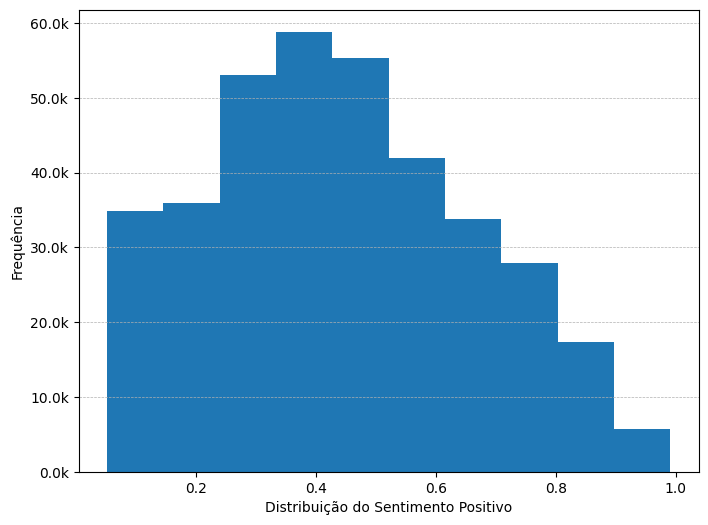

In [38]:
df_ = df[(df['sentiment'] == 'Positivo')]

def thousands(x, pos):
    'The two args are the value and tick position'
    return '%1.1fk' % (x*1e-3)

formatter = FuncFormatter(thousands)

fig, ax = plt.subplots(figsize = (8, 6))
plt.xlabel("Distribuição do Sentimento Positivo")
plt.ylabel("Frequência")
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.5)
ax.yaxis.set_major_formatter(formatter)
ax.hist(df_['sentiment_value'], bins=10)